### Mengimport library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

In [2]:
# membaca data file
data = pd.read_csv('data_banknote_authentication.csv', header=None)
data

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


### Melakukan analisa terhadap data

In [3]:
# melihat tipe data dan apakah ada data yang kosong atau tidak
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   float64
 2   2       1372 non-null   float64
 3   3       1372 non-null   float64
 4   4       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
data.describe()

,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
# memisahkan fitur dan target (kelas)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

### Memplot data

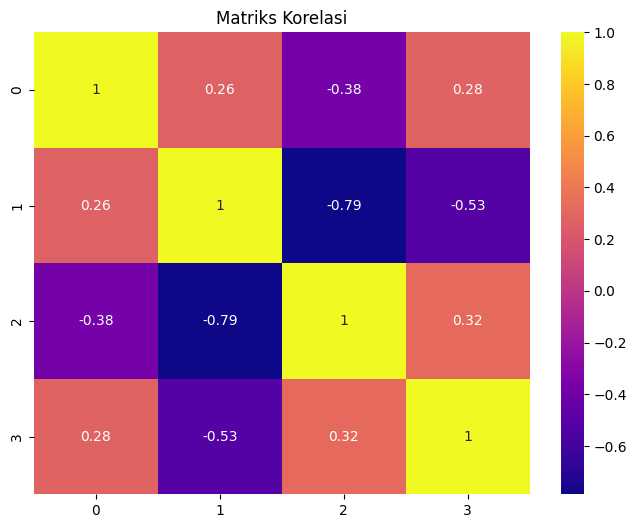

In [6]:
# melakukan plot untuk melihat hubungan setiap fitur
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=True, cmap='plasma')
plt.title('Matriks Korelasi')
plt.show()

### Menerapkan PCA

In [7]:
# menormalkan data sebelum menerapkan PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_scaled.dtype

dtype('float64')

In [9]:
# menginisialisasikan PCA dan mereduksi fitur menjadi 2d 
pca = PCA(n_components=2)
dataPCA = pca.fit_transform(X_scaled)

In [10]:
dataPCA

array([[ 1.47280494,  1.16391668],
       [ 1.63944068,  1.09381204],
       [-0.51391884,  1.32487953],
       ...,
       [-4.04932734, -2.03602288],
       [-3.01961738, -1.39214023],
       [-1.17058249, -0.09103094]])

In [11]:
principalDf = pd.DataFrame(data = dataPCA, columns = ['PC1', 'PC2'])
principalDf

,PC1,PC2
0,1.472805,1.163917
1,1.639441,1.093812
2,-0.513919,1.324880
3,2.310952,0.202514
4,-1.193416,-0.024654
...,...,...
1367,0.221995,0.290458
1368,-1.909395,-0.142149
1369,-4.049327,-2.036023
1370,-3.019617,-1.392140


In [13]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf

,PC1,PC2,4
0,1.472805,1.163917,0
1,1.639441,1.093812,0
2,-0.513919,1.324880,0
3,2.310952,0.202514,0
4,-1.193416,-0.024654,0
...,...,...,...
1367,0.221995,0.290458,1
1368,-1.909395,-0.142149,1
1369,-4.049327,-2.036023,1
1370,-3.019617,-1.392140,1


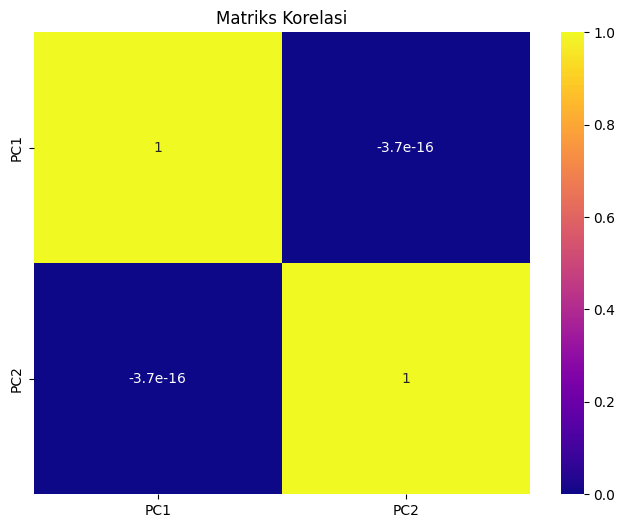

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(principalDf.corr(), annot=True, cmap='plasma')
plt.title('Matriks Korelasi')
plt.show()

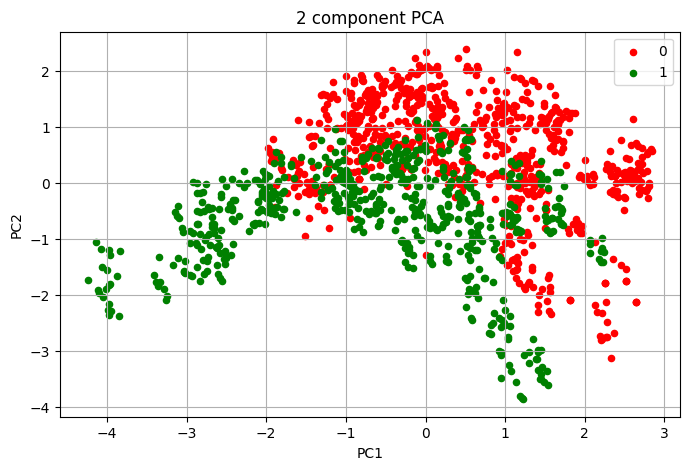

In [15]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title('2 component PCA')

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[4] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 20)
ax.legend(targets)
ax.grid()